In [1]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Downloading reviews from amazon for iPhone 13 pro max

In [3]:
iphone_reviews=[]

In [4]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone_reviews = iphone_reviews+op

In [5]:
len(iphone_reviews)

270

In [6]:
rev={"review":iphone_reviews}

In [7]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [8]:
review_data

,review
0,\n\n According to me guysFirst of all I haven't purchased iPhoneSecondly according to me if you have this much budget of more than 1lakhs spending on mobile is not worth at allInfact you can invest that money on apple stock or other stock so that the money could get doubled in future bcoz buying iPhone is a depreciating assetHope you understand 🙂\n\n
1,"\n\n Battery is great and performance is good but Americans are paying 1599$ dollars ( i.e. 119000 Rs) for iphone pro max 1TB but Indian has to pay 179900 Rs, so we are paying 60000 Rs more for this quaint looking phone with no software customisation, disgusting caterpillar notch, with no USB C and no charger ,Ridiculous how indians are fooled by just brandRelatively vivo x70 pro+ has better camera , nightmode and portrays than this overpriced junkFinally apple should open assembly factory in india otherwise it will eventually be obliterated by competitionWhy should pay 60K more ....not sensible\n\n"
2,\n\n The product is good but think carefully before buying from here. Apple has new warranty policies. In case of defective product you will not get a replacement no matter whatever is mentioned here. I received a defective device and did not get a replacement from amazon.\n\n
3,\n\n refund\n\n
4,"\n\n\n\n\n The media could not be loaded.\n \n\n\n\n\n From iPhone 6S in 2015 to iPhone 13 pro max in 2021 ,, one thing that still remains the same is it’s performance! I own an oneplus device but there is no comparison between these two! Apple made it a beast. From camera to gaming.. everything is top notch. The battery life is superb, best till now. Normal usage can go upto 3 days with full charge. Bought the earpods pro & iwatch to compliment this beast🤭\n\n"
...,...
265,"\n\n I was very skeptical about the genuineness of the product that I would receive as it was not available in stock in stores. So, I brought all my gut feeling together and made this purchase. The product was delivered in time. When I opened the box, it was strikingly beautiful. I checked for its authenticity by verifying it from all different ways. Now, most importantly a genuine Apple iPhone 13 pro max phone was in my hand. It works great for me and has a longer battery life than the previous phones that I've had.\n\n"
266,\n\n\n\n\n The media could not be loaded.\n \n\n\n\n\n Heavy phone.. Clean and sharp finish .. Gorgeous phone\n\n
267,\n\n This phone is so heavy and slippery and hard to hold.It has given me muscle strains and I can’t hold stuff in my hand properly using grip because of the weight and holding the phone in hand for long.\n\n
268,\n\n 1. Blue Colour is good.2. Battery is very long lasting. For my usage with 1 full charge I can use it for 2 full days.3. Camera should be improved. There are competitor phones for way lesser price than this phone with very good camera quality.4. Phone is little heavy but will get used to after some days.5. Sound quality is amazing.6. Display is also very good. But can’t feel much difference with 120 Hz display and older iPhones.7. Overall performance of the phone is good.\n\n


In [9]:
iphone_reviews = list(set(iphone_reviews))

In [10]:
txt_upd = ' '.join(iphone_reviews)

In [11]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [12]:
text_tokens = word_tokenize(txt_upd)

In [13]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [14]:
tf = TfidfVectorizer()

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
text_tf = tf.fit_transform(tokens_without_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,according,allinfact,amazing,amazon,americans,apple,assembly,assethope,authenticity,available,...,verifying,vivo,warranty,way,ways,weight,whatever,works,worth,would
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
word_list = ' '.join(df)

In [18]:
wordcloud = WordCloud(background_color='white',
                      width=1800,
                      height=1400).generate(word_list)

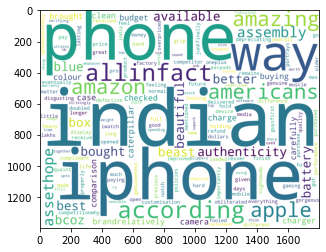

In [19]:
plt.imshow(wordcloud)

# Sentimental analysis

In [20]:
with open('D:/DS/Assignments/Assign 1/Text mining/positive-words.txt',"r") as pw:
    positive_words = pw.read().split("\n")

In [21]:
positive_words = positive_words[35:]

In [25]:
with open('D:/DS/Assignments/Assign 1/Text mining/negative-words.txt',"r") as pw:
    negative_words = pw.read().split("\n")

In [26]:
negative_words = negative_words[35:]

In [28]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])
wordcloud_neg = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [29]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

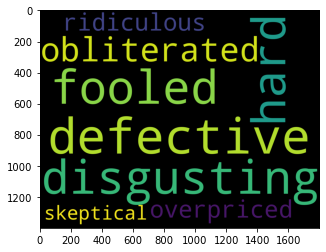

In [30]:
plt.imshow(wordcloud_pos)

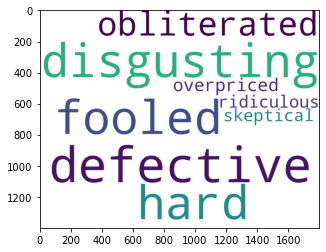

In [31]:
plt.imshow(wordcloud_neg)